# Google Data Project

In [29]:
import numpy as np           
import matplotlib.pyplot as plt
from scipy import signal
import os
import fnmatch
import astropy.units as u
from astropy.time import Time
from sunpy.time import parse_time
from astropy.table import Table
import pandas as pd
import matplotlib
%matplotlib inline  

Import the data from files: 

In [30]:
import DataCenterImport as DC
dat=DC.DataCenter('/Volumes/DataDisk/GoogleData/')

Alternatively, to reload the data:

In [105]:
import importlib
importlib.reload(DC)
dat=DC.DataCenter('/Volumes/DataDisk/GoogleData/')

Reads and provides data sets for analysis:
            site_info - table of information for each site;
            nmdb_set - Neutron Monitor Database;
            error_set - Error rate of data center;
            wx_set - weather info for each data center;
            goes_set - P7 high energy particle flux information;

Compute average error for each building

In [42]:
error_ave = np.array([np.mean(dat.error_set['rate'][dat.error_set['loc_id'] == idnum]) for idnum in dat.site_info['ID']])
error_std = np.array([np.std(dat.error_set['rate'][dat.error_set['loc_id'] == idnum]) for idnum in dat.site_info['ID']])

plot error rate vs altitude 

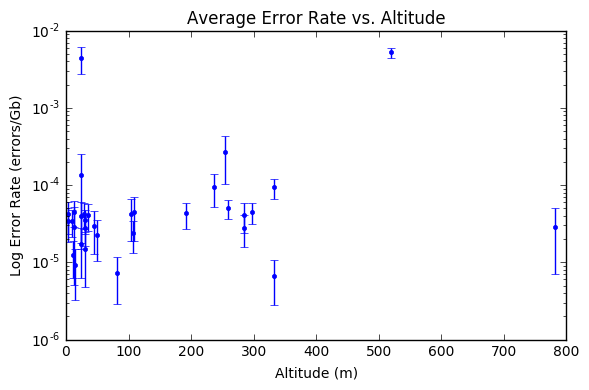

In [43]:
ax = plt.subplot(111)
ax.set_yscale("log", nonposy='clip')

plt.errorbar(dat.site_info['Altitude'], error_ave, yerr=error_std,fmt='.')
ax.set_xlabel('Altitude (m)')
ax.set_ylabel('Log Error Rate (errors/Gb)')
ax.set_title('Average Error Rate vs. Altitude')
plt.tight_layout()


Create a date range for each center id:

In [44]:
tbegin=[np.min(dat.error_set.index[dat.error_set['loc_id'] == idnum]) for idnum in dat.site_info['ID']]
tend=[np.max(dat.error_set.index[dat.error_set['loc_id'] == idnum]) for idnum in dat.site_info['ID']]

For each data center site, resample to 5 minute interval between the beginning and ending date of the error date. Linear interpolation over NAN's generated by upsampling. In this case the id_index is a list of cite id numbers.

In [113]:
id_index = 32 ## 0 to 32
errors=dat.error_set.where(dat.error_set['loc_id'] == dat.site_info['ID'][id_index]).dropna().resample(
    '5T').interpolate(method='linear')[tbegin[id_index]:tend[id_index]]

wx=dat.wx_set.where(dat.wx_set['loc_id'] == dat.site_info['ID'][id_index]).dropna().resample('5T').interpolate(
    method='linear')[tbegin[id_index]:tend[id_index]]

goes=dat.goes_set.resample('5T').interpolate(method='linear')[tbegin[id_index]:tend[id_index]]

nmdb=dat.nmdb_set.resample('5T').interpolate(method='linear')[tbegin[id_index]:tend[id_index]]
